In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 24s 49ms/step - loss: 0.3027 - accuracy: 0.9071 - val_loss: 0.0652 - val_accuracy: 0.9794
Epoch 2/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0971 - accuracy: 0.9713 - val_loss: 0.0406 - val_accuracy: 0.9876
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0698 - accuracy: 0.9786 - val_loss: 0.0341 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0282 - val_accuracy: 0.9907
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0276 - val_accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0259 - val_accuracy:

In [8]:
accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy[1]*100}%')

Test accuracy: 99.11999702453613%


In [7]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [8]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


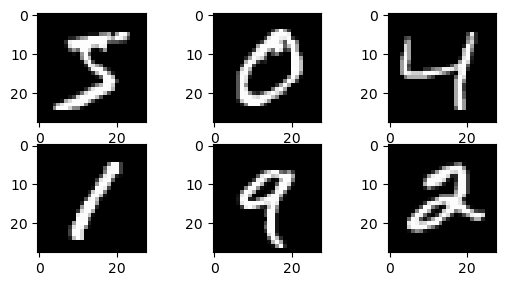

In [12]:
for i in range(6):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()